In [1]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
import os
import base64
import requests

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 3, Finished, Available)

In [2]:
# %pip install opencv-python-headless imutils

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 4, Finished, Available)

In [3]:
import os
print(os.listdir("/lakehouse/default/Files/"))

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 5, Finished, Available)

['Acne_share.jpg', 'Cellulitis (1).jpg', 'Cellulitis3.jpg', 'Dermatitis2015.jpg', 'alopecia.jpg', 'cellulitis.jpg', 'nothing.jpeg', 'rosacea.jpg', 'rosacee-avril.webp']


In [4]:
CONTEXT = """You are an experienced dermatologist, who can classify skin diseases in a picture. 
Your task is to return the class names of skin diseases that might be present in the picture, and nothing else. Just the class names.
You must use the following return format:

<class1>,<class2>,etc..

If there are more possibilities, return all of them. 

If there are no skin conditions in the picture, return \"None\"."""

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 6, Finished, Available)

In [5]:
# # # AzureOpenAI
# def find_disease(image_path):
#     GPT4V_KEY = ""

#     encoded_image = base64.b64encode(open(image_path, 'rb').read()).decode('ascii')
#     headers = {
#         "Content-Type": "application/json",
#         "api-key": GPT4V_KEY,
#     }

#     # Payload for the request
#     payload = {
#     "messages": [
#         {
#         "role": "system",
#         "content": [
#             {
#             "type": "text",
#             "text": CONTEXT
#             }
#         ]
#         },
#         {
#         "role": "user",
#         "content": [
#             {
#             "type": "image_url",
#             "image_url": {
#                 "url": f"data:image/jpeg;base64,{encoded_image}"
#             }
#             },
#             {
#             "type": "text",
#             "text": "Return the classes from the following picture:"
#             }
#         ]
#         }
#     ],
#     "temperature": 0.7,
#     "top_p": 0.95,
#     "max_tokens": 800
#     }

#     GPT4V_ENDPOINT = "https://endavaopenai-devtest.openai.azure.com/openai/deployments/gpt-4-vision/chat/completions?api-version=2024-02-15-preview"

#     # Send request
#     response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
#     response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code

#     # Handle the response as needed (e.g., print or process)
#     return response.json()

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 7, Finished, Available)

In [6]:
# Vanilla OpenAI
import os
import base64
import requests

api_key = ""

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

def find_disease(image_path):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
    }

    payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
        {
        "role": "system",
        "content": CONTEXT
        },
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": "Return the classes from the following picture:"
            },
            {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }
            }
        ]
        }
    ],
    "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    return response.json()

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 8, Finished, Available)

In [7]:
# load pictures
import os
path_to_lake = "/lakehouse/default/Files/"
pictures = os.listdir(path_to_lake)
pictures

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 9, Finished, Available)

['Acne_share.jpg',
 'Cellulitis (1).jpg',
 'Cellulitis3.jpg',
 'Dermatitis2015.jpg',
 'alopecia.jpg',
 'cellulitis.jpg',
 'nothing.jpeg',
 'rosacea.jpg',
 'rosacee-avril.webp']

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 10, Finished, Available)

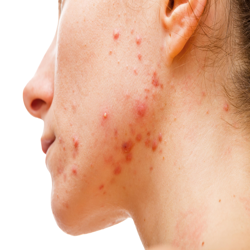

Acne_share.jpg -> Acne Vulgaris


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

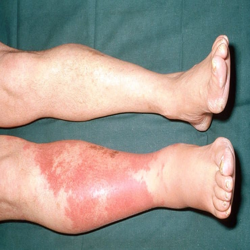

Cellulitis (1).jpg -> Cellulitis


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

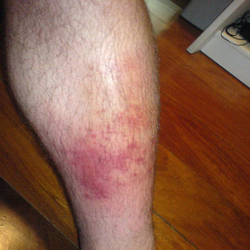

Cellulitis3.jpg -> eczema,psoriasis,contact dermatitis


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

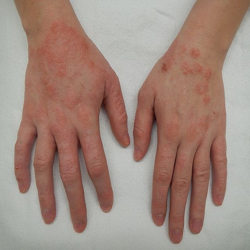

Dermatitis2015.jpg -> Contact dermatitis,Psoriasis,Eczema


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

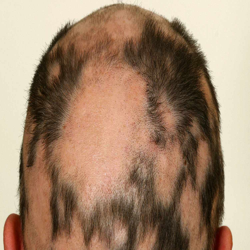

alopecia.jpg -> Alopecia areata


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

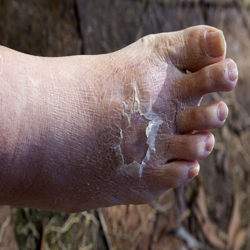

cellulitis.jpg -> Xerosis_cutis


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

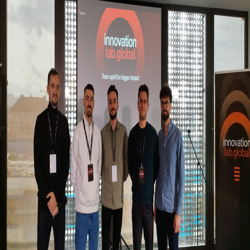

nothing.jpeg -> None


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

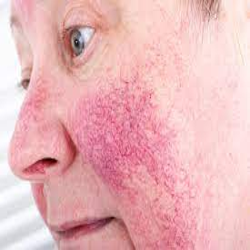

rosacea.jpg -> rosacea


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

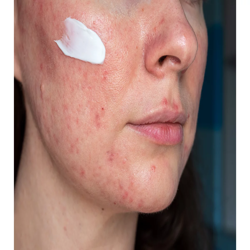

rosacee-avril.webp -> Acne Vulgaris


Cooling down LMM:   0%|          | 0/50 [00:00<?, ?it/s]

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 11, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 12, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 13, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 14, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 15, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 16, Finished, Available)

StatementMeta(, 41a6777e-94fb-4544-9bcd-433419acac8e, 17, Finished, Available)

In [8]:
import os
import base64
import requests
from PIL import Image
import time 

from tqdm.notebook import tqdm

# Define your total sleep time
total_sleep_time = 5  # 5 seconds

# 0.1 seconds 50 times to sum up to 5 seconds
intervals = 50

for pic in pictures:
    # try:
    disease = find_disease(path_to_lake + pic)["choices"][0]["message"]["content"]

    # except:
    #     disease = "ERROR"

    im = Image.open(path_to_lake + pic) 
    im = im.resize((250,250))
    im.show()
    print(f'{pic} -> {disease}')

    # if you're not using Azure, comment the last 2 lines
    for irrelevant in tqdm(range(intervals), desc="Cooling down LMM"):
        time.sleep(total_sleep_time / intervals)